#Clustering based on Key Identification

##Input and Structure


* in =  dataset to be clustered, stop criteron eg. no. of clusters or eps 


* **c_target: desired number of clusters**


* **N: number of data**


* **d_original: NxN distance matrix**. (for m data, mxm matrix that, for row i column j, value is distance between ith and jth datapoint in dataset. d_original[i,j]=dist(i,j)


* metric: ‘cosine’, ‘euclidean’, ‘hamming’


* **Rk(i): k datapoints** (except i) **nearest neighbors** to i (smallest distance) assigned using d_original
k is constant (0, N-1)


* **L: list of N numbers** representing label of each datapoint (for i, L[i] is the **number of cluster** that i belongs to)
init -> L = [1,2,3,...,N]
at firstT each datapoint is its own cluster


* **g:** constant, **nuumber of iterations** >1


##Key Element Selection

* **c: desired number of key elements**

a key element is a single data element or an intermediate cluster 
key elements/centroids are a member of the cluster
having d_original and c, we can create set of c numbers corresponding to index of datapoints that are key elements

### **Objective Function 1:**
Select element that on average, has the smallest distance from any other element in the dataset.
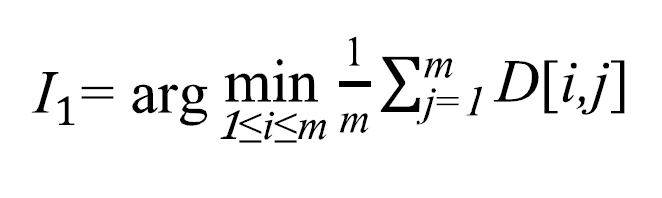

###**Objective Function 2:**
Iteratively search for the next key element, In, such that it has the maximum minimum distance to the elements that have been selected so far.
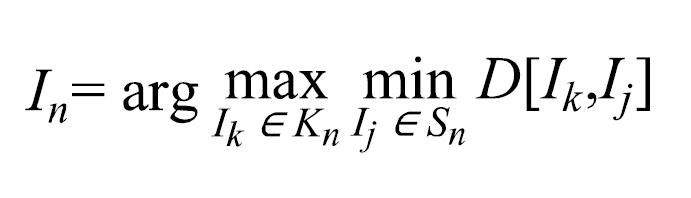


 


* **Sn: The set of elements that have been selected so far** until the nth iteration.

* **Kn: The set of elements that are not yet selected** until the nth iteration.

The process of key elemeny selection ends when the number of selected key elements is equal to c.

##Clustering
Given a **data set**, a **stopping criterion** such as the optimal number of clusters and an **algorithm to identify key elements** in a data set, the clustering is started while considering the dataset as a set of **N clusters**, each **containing only one element**.
The algorithm continues iteratively by merging smaller clusters with each other and producing larger clusters. These mergers happen repeatedly; Therefore, several steps of merging may take place to leave exactly c_target clusters.

in each iteration:
* **c_previous: The number of clusters at the start of that iteration**
* **c_current: is the desired number of clusters obtained at the end of that iteration**

Initialized in the first iteration:
c_previous=N
c_current=[N/g]




* **d_current: maintains the distance between the current clusters** during the execution of the algorithm


 ***sets the distance between two primary
clusters i and j equal to the average pairwise distance between all k nearest neighbors of i and j***


Function 3 Initialization 
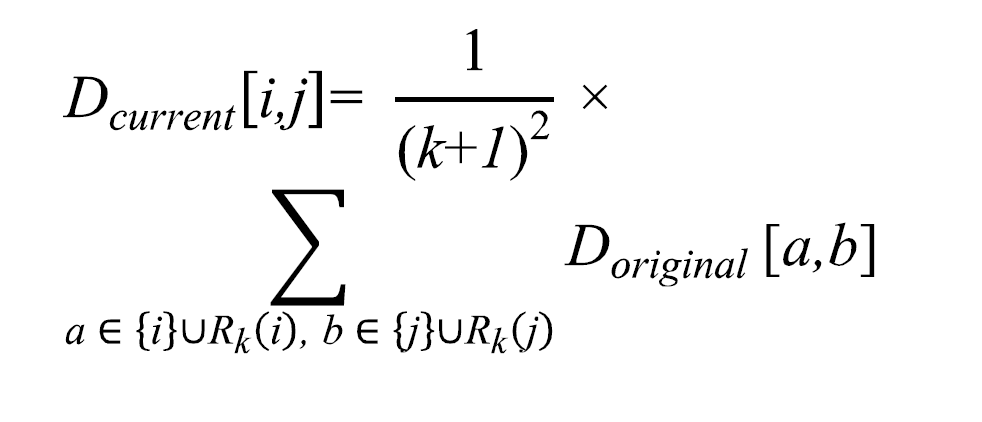

Rk(i) and Rk(j) refer to the sets of k members of the nearest neighbors of the elements i and j

##The following steps are repeated until c_current > c_target

###**Step 1)** 
*Identification of key elements:*


Apply the key element selection algorithm to d_current to identify the **number of current key elements**.
* s_current: contains number of current key elements

###**Step 2)** *Update the clustering labels:* 

Each element that was not selected as a key element (single data element or an intermediate cluster) is **merged with the closest key element to it** which can be found by d_current. Merging is done by updating the cluster labels in L for the elements that are members of the merging cluster.

----> for each datapoint i that is not a member of a selected cluster (L[i] is not in s_current) the following update occurs:
Function 4

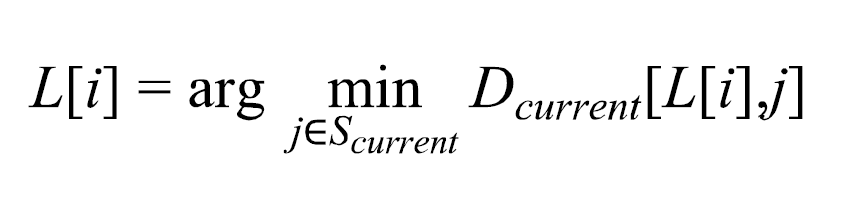

if necessary, the clusters are relabeled so that L contains elements from {1,2,3,...,c_current}

###**Step 3)** *Update the distance matrix:*

d_current is updated in order to store the distances between c_current new clusters made because of the previous mergers. 

Suppose Pi represents a set that includes all elements of cluster i plus all their neighbors.

Function 5

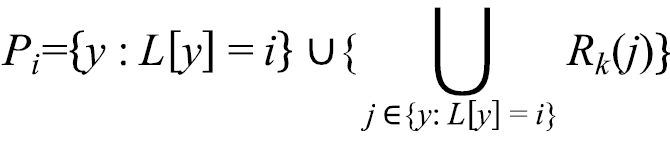

Row i and column j of updated d_current with size c_current * c_current is calculated as follows:

Function 6

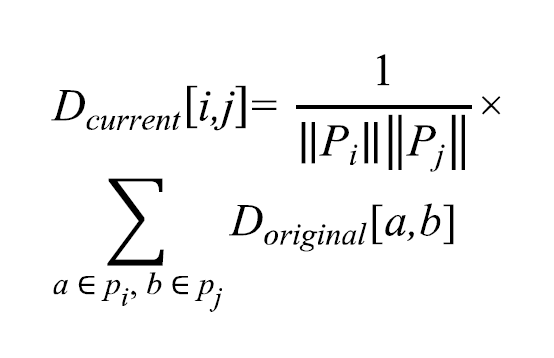

||Pi|| represents the number of elements in Pi.

The distance between two clusters i, j is equal to the average two-by-two distance between all the elements in Pi and Pj.
In this way, all the points of a cluster and their nearest neighbors are affected in measuring the distance of that cluster with other clusters. As a result, the measured distance will be more accurate.

###**Step 4)** *Update c_previous and c_current values:*
This step is done as follows:


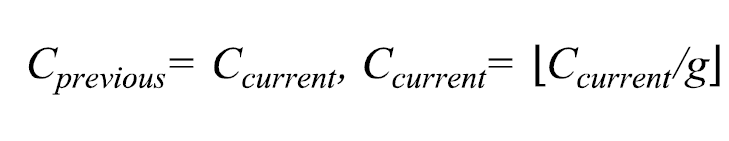




> steps:
1. in=N datapoints ,,,, stop criteron(c_target)
1. calculate N*N distance matrix d_original
1. select k in range (0,N-1), for each datapoint set Rk(p) as k nearest neighbors
1. g>1, L=[1,2,...,N], each data element is one cluster
1. c_previous = N ,,,, c_current = [N/g] ,,,, calculate d_current
1. if c_current > c_target
>> **identify key clusters (in=c_current, d_current , out=s_current)**
>> * update labels to represent new centroids, for every element i not in s_current apply function 3
>> * calculate and update d_current 
>> * c_previous = c_current ,,,, c_current = [c_current/g]
>> * go back to 6
1. else 
>> **identify key clusters (in=c_target, d_current , out=s_final)**
>> * update labels to represent new centroids, for every element i not in s_current apply function 3
>> return L as output










> steps:
1. in=d_original: NxN distance matrix ,,,, stop criteron (c_target: desired number of clusters)
1. select i1 (object function 1)
1. K1 = {1,...,m} \ {I1} ,,,, S1={I1} ,,,, n=1
1. if (n==c) output = {I1,I2,...,Ic}
1. else In+1 (object function 2)
1.Kn+1 = Kn \ {In+!} ,,,, Sn+1 = Sn U {In+1} ,,,, n=n+1




In [ ]:
import csv
# read csv file and extract IDs, comments and topics and save data in lists
def read_file(name):
    users = []
    comments = []
    topics = []
    file = open(name, 'r')
    reader = csv.DictReader(file)
    for col in reader:
        users.append(col['Id'])
        comments.append(col['Comment'])
        topics.append(col['Topic'])
    return users, comments, topics

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

class key_item_clustering(object):

  def __init__(self,arr,N,n_cluster,k):
    self.arr=arr
    self.N=N
    self.c_target = n_cluster
    self.k = k
    self.g=2 # g should be greater than 1
    self.d_original = np.zeros((N,N))
    self.L = np.zeros(N)
    self.c_previous = 0
    self.c_current = N
    self.I = np.zeros(self.N)
    self.P=np.zeros(N)
    self.s_current=arr
    self.d_current = self.init_d_current()

  def calc_dorg(self): 
    for i in range(self.N):
      for j in range(self.N):
        self.d_original[i,j] = pairwise_distances(self.arr[i],self.arr[j], metric='euclidean')


  def calculate_R(self,p):
    neighbors=np.zeros(self.N)
    for j in range(self.N):
      neighbors[j] = self.d_original [p,j]
    min_indices = np.argpartition(neighbors,self.k-1)[:self.k]
    return neighbors[min_indices]

  def init_L(self):
    for i in range(self.N):
      self.L[i] = i + 1

  def identify_key_clusters(self,c,d):
    self.I[0] = self.func1()
    for i in len(self.I):
      i += 1
      self.find_In(i)

  def fit(self):
    self.init_L()
    self.calc_dorg
    self.calculate_R
    self.identify_key_clusters(self.c_current,self.d_original)
    if self.c_current == self.c_target:
      return self.s_current
    while(self.c_current > self.c_target):
      self.identify_key_clusters(self.c_current,self.d_original)
      self.update_c()
      self.update_d_current()
      self.update_L()
      #  self.update_s_current
    return self.s_current

  def func1(self):
    sum=np.zeros(self.N)
    for i in range (1,self.N):
      for j in range (1,self.N):
        sum[i]+=self.d_original[i,j]
      sum[i]/=self.N
      self.In.append(min(sum))
    return min(sum)

  def find_In(self,n):
    for k in range (1,len(self.k)):
      for j in range (1,len(self.s_current)):
        D=pairwise_distances(self.I[k],self.I[j], metric='euclidean')
        min = min(self.I[k], self.s_current[j])

  def update_c(self):
    self.c_previous = self.c_current
    self.c_current = self.c_current / self.g

  def init_d_current(self):
    sum = 0
    for i in range(1,self.N):
      for j in range(1,self.N):
        Ri = self.calculate_R(i)
        Rj = self.calculate_R(j)
        Ri.append(i)
        Rj.append(j)
        for a in Ri:
          for b in Rj:
            sum += self.d_original[a][b]
        self.d_current[i][j] = (1/((self.k+1)**2))*sum
    return self.d_current

    def update_d_current(self,i):
      self.P[i] = self.L[i]
      for j in len(self.L[i]):
        self.P[i] = self.P[i] + self.R[j]
      for i in len(self.d_current):
        for j in len(self.d_current):
          coef=1/(len(self.P[i])*len(self.P[j]))
          sum=0
          for a in len(self.P[i]):
            for b in len(self.P[j]):
              sum += self.d_original[a][b]
        self.d_current[i][j]=coef*sum

    def update_L(self):
      for i in self.arr:
        for j in self.s_current:
          self.L[i] = min(self.d_current[i], j)

    # def update_s_current(self):
      



In [ ]:
def vectorize(arr):
  vect = CountVectorizer()
  vect.fit(arr)
  vectorized_array = vect.transform(arr)
  return vectorized_array

In [ ]:
users, comments, topics = read_file('test.csv')

model = key_item_clustering()
vectorized_array = vectorize(comments)
model.__init__(vectorized_array,len(vectorized_array),len(vectorized_array),1)
model.fit()


##The above four steps will be repeated until c_current <= c_target is established. 

If the value of c_current in the last iteration is not equal to c_target, the above four-step process is run for one more time **c_current = c_target** runs.

#Improving Bag of Words using Word2Vec



In [ ]:
import numpy as np
import pandas as pd
import time
import re 

'''Features'''
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2, SelectKBest

'''Classifiers'''
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

'''Display'''
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

'''Classifiers'''
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

'''Lemmatizer'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

'''Stemmer'''
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer

'''Progress  Bar'''
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

'''Stopwords Corpus'''
import nltk
from nltk.corpus import stopwords, wordnet
import string

import math 

from collections import Counter
from nltk import word_tokenize
from nltk.util import ngrams

from textblob import TextBlob

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

##Load Data and preprocess

In [ ]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from sklearn.cluster import AgglomerativeClustering,KMeans 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# reading dataset
reddit_df = pd.read_csv('/content/gdrive/MyDrive/nlp/train.csv')
reddit_df.info()

# check missing values
missing = reddit_df.isnull().sum().sum()
if missing > 0:
    reddit_df.dropna(inplace=True)
    
# removing duplicates 
duplicates = reddit_df.duplicated().sum() 
if duplicates > 0:
    reddit_df.drop_duplicates(inplace=True)

reddit_df = reddit_df.drop('Id', axis=1)
reddit_df.info()

# general statistics of data 
reddit_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  8695 non-null   object
 1   Topic    8695 non-null   object
dtypes: object(2)
memory usage: 136.0+ KB


,Comment,Topic
count,8695,8695
unique,7950,3
top,[removed],Biology
freq,114,3591


In [ ]:
def clean_text(df):
    all_reviews = list()
    lines = df["Comment"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", " i am", text)
        text = re.sub(r"he's", " he is", text)
        text = re.sub(r"she's", " she is", text)
        text = re.sub(r"that's", " that is", text)        
        text = re.sub(r"what's", " what is", text)
        text = re.sub(r"where's", " where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", " will not", text)
        text = re.sub(r"don't", " do not", text)
        text = re.sub(r"did't", " did not", text)
        text = re.sub(r"can't", " can not", text)
        text = re.sub(r"it's", " it is", text)
        text = re.sub(r"couldn't", " could not", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"gonna", " going to", text)
        text = re.sub(r"cannot", " can not", text)
        text = re.sub(r"wouldn't", " would not", text)
        text = re.sub(r"oughtn't", "ought not", text)
        text = re.sub(r"weren't", "were not", text)
        text = re.sub(r"wasn't", "was not", text)
        text = re.sub(r"shan't", "shall not", text)
        text = re.sub(r"shouldn't", "should not", text)
        text = re.sub(r"isn't", "is not", text)
        text = re.sub(r"haven't", "have not", text)
        text = re.sub(r"hasn't", "has not", text)
        text = re.sub(r"hadn't", "had not", text)
        text = re.sub(r"doesn't", "does not", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"aren't", "are not", text)
        text = re.sub(r"ain't", "is not", text)
        text = re.sub(r"https", " http", text)
        text = re.sub(r"youtu.be", " youtube", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"n\'t", " n\'t", text)
        text = re.sub(r"\s{2,}", " ", text)
        text = re.sub(r"!", " ! ", text)
        text = re.sub(r"\?", " ? ", text)
        text = re.sub(r"\'ll", " will", text)        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        #stop_words.discard("not")
        #PS = PorterStemmer()
        words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

In [ ]:
all_reviews = clean_text(reddit_df)

In [ ]:
reddit_df['Comment'] = all_reviews

In [ ]:
reddit_df

,Comment,Topic
0,things might negative frequency dependent sele...,Biology
1,hard believe exist particulars detect anything...,Physics
2,bees,Biology
3,medication technician alot drugs liver probabl...,Biology
4,cesium pretty metal,Chemistry
...,...,...
8690,make similar observations last weeks southern ...,Biology
8691,would know,Biology
8692,also use correct number sig figs,Chemistry
8693,ethical delimmas groundbreaking technology fut...,Biology


In [ ]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

In [ ]:
corpus = build_corpus(reddit_df['Comment'])

In [ ]:
np.shape(corpus)

(8695,)

In [ ]:
L_text = reddit_df.Comment.loc[reddit_df.Topic =="Biology"].tolist()
L_text2 = reddit_df.Comment.loc[reddit_df.Topic =="Physics"].tolist()
L_text3 = reddit_df.Comment.loc[reddit_df.Topic =="Chemistry"].tolist()

In [ ]:
text = reddit_df.Comment.tolist()

###Sentiment Analysis

In [ ]:
count_unigram=Counter()

for i in range(len(L_text)):
  token = word_tokenize(L_text[i])
  unigram = ngrams(token,1)
  count_unigram += Counter(unigram)

for i in range(len(L_text2)):
  token = word_tokenize(L_text2[i])
  unigram = ngrams(token,1)
  count_unigram += Counter(unigram)

for i in range(len(L_text3)):
  token = word_tokenize(L_text3[i])
  unigram = ngrams(token,1)
  count_unigram += Counter(unigram)

In [ ]:
count_unigram

Counter({('things',): 272,
         ('might',): 199,
         ('negative',): 41,
         ('frequency',): 23,
         ('dependent',): 18,
         ('selection',): 19,
         ('going',): 256,
         ('least',): 132,
         ('common',): 80,
         ('phenotype',): 5,
         ('reflected',): 3,
         ('genotype',): 3,
         ('advantage',): 15,
         ('environment',): 27,
         ('instance',): 17,
         ('prey',): 15,
         ('animal',): 36,
         ('vole',): 1,
         ('light',): 212,
         ('dark',): 84,
         ('predator',): 4,
         ('recognize',): 10,
         ('food',): 100,
         ('voles',): 2,
         ('foxes',): 1,
         ('may',): 200,
         ('keeping',): 12,
         ('closer',): 20,
         ('eye',): 21,
         ('phenotypic',): 2,
         ('recognising',): 2,
         ('good',): 408,
         ('would',): 1295,
         ('reduce',): 13,
         ('causing',): 25,
         ('alleles',): 5,
         ('due',): 71,
         ('increas

Category 1 - where (x-axis :  polarity/subjectivity , y-axis :  number of comments)
mean_polarity: 0.05143929279054866
std_polarity: 0.23755601890742228

mean_subjectivity: 0.2651672810405025
std_subjectivity: 0.2990801117099402


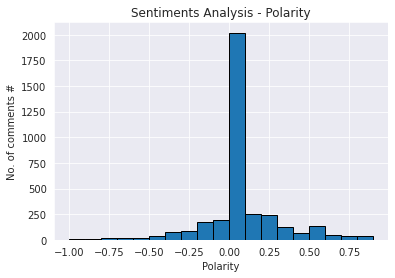

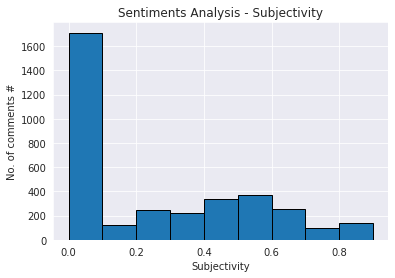

In [ ]:
polarity = [] # Polarity(float) - lies b/w [-1,1], where "+1" indicates positive sentiments and "-1" indicates negative sentiments
subjectivity = [] # Subjectivity(float) - lies b/w [0,1]. It refers to an opinion/emotion etc.

for i in range(len(L_text)):
    Sentiment = TextBlob(L_text[i]).sentiment
    polarity.append(Sentiment.polarity)
    subjectivity.append(Sentiment.subjectivity)

print("Category 1 - where (x-axis :  polarity/subjectivity , y-axis :  number of comments)")

mean_polarity = sum(polarity)/len(polarity)
summ = 0
for i in range(len(polarity)):
    summ = summ + pow(polarity[i]- mean_polarity,2)

std_polarity = math.sqrt(summ/len(polarity))

print("mean_polarity: " + str(mean_polarity))
print("std_polarity: " + str(std_polarity)+"\n")

mean_subjectivity = sum(subjectivity)/len(subjectivity)
summ = 0
for i in range(len(subjectivity)):
    summ = summ + pow(subjectivity[i] - mean_subjectivity,2)

std_subjectivity = math.sqrt(summ/len(subjectivity))

print("mean_subjectivity: "+ str(mean_subjectivity))
print("std_subjectivity: " + str(std_subjectivity))

#plot taking uniform buckets to club the polarity values 
plt.title("Sentiments Analysis - Polarity") 
plt.hist(polarity,bins = np.arange(-1,1,0.1),ec='black') #to show separate bins 
plt.ylabel('No. of comments #')
plt.xlabel('Polarity')
plt.show()

#plot taking uniform buckets to club the polarity values 
plt.title("Sentiments Analysis - Subjectivity") 
plt.hist(subjectivity,bins = np.arange(0,1,0.1),ec='black') #to show separate bins 
plt.ylabel('No. of comments #')
plt.xlabel('Subjectivity')
plt.show()

Category 2 - where (x-axis :  polarity/subjectivity , y-axis :  number of comments)
mean_polarity: 0.07040698456605615
std_polarity: 0.2280180407511441

mean_subjectivity: 0.2735991772952279
std_subjectivity: 0.2905130527021165


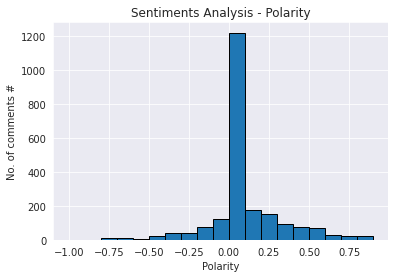

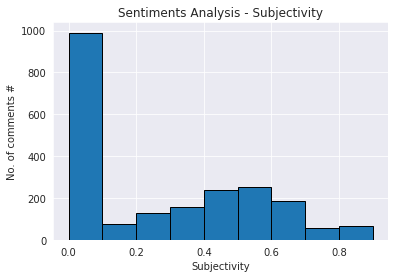

In [ ]:
# Similarly taking Category 2 from dataframe


polarity2 = []
subjectivity2 = []
for i in range(len(L_text2)):
    Sentiment = TextBlob(L_text2[i]).sentiment
    polarity2.append(Sentiment.polarity)
    subjectivity2.append(Sentiment.subjectivity)

print("Category 2 - where (x-axis :  polarity/subjectivity , y-axis :  number of comments)")

mean_polarity2 = sum(polarity2)/len(polarity2)
summ = 0
for i in range(len(polarity2)):
    summ = summ + pow(polarity2[i] - mean_polarity2,2)

std_polarity2 = math.sqrt(summ/len(polarity2))

print("mean_polarity: " + str(mean_polarity2))
print("std_polarity: " + str(std_polarity2)+"\n")

mean_subjectivity2 = sum(subjectivity2 )/len(subjectivity2)
summ = 0
for i in range(len(subjectivity2)):
    summ = summ + pow(subjectivity2[i]- mean_subjectivity2,2)

std_subjectivity2 = math.sqrt(summ/len(subjectivity2))

print("mean_subjectivity: "+ str(mean_subjectivity2))
print("std_subjectivity: " + str(std_subjectivity2))

# taking uniform buckets to club the polarity values 
plt.title("Sentiments Analysis - Polarity") 
plt.hist(polarity2,bins = np.arange(-1,1,0.1),ec='black') #to show separate bins 
plt.ylabel('No. of comments #')
plt.xlabel('Polarity')
plt.show()

# taking uniform buckets to club the polarity values 
plt.title("Sentiments Analysis - Subjectivity") 
plt.hist(subjectivity2,bins = np.arange(0,1,0.1),ec='black') #to show separate bins 
plt.ylabel('No. of comments #')
plt.xlabel('Subjectivity')
plt.show()

Category 3 - where (x-axis :  polarity/subjectivity , y-axis :  number of comments)
mean_polarity: 0.07057248949144196
std_polarity: 0.24007395917112517

mean_subjectivity: 0.26776596225063476
std_subjectivity: 0.29577328202029285


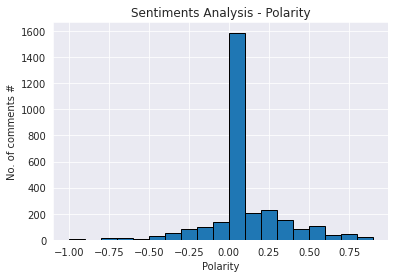

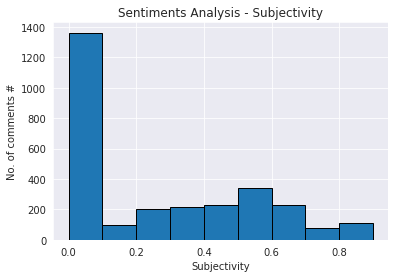

In [ ]:
# Similarly taking Category 3 from dataframe


polarity3 = []
subjectivity3 = []
for i in range(len(L_text3)):
    Sentiment = TextBlob(L_text3[i]).sentiment
    polarity3.append(Sentiment.polarity)
    subjectivity3.append(Sentiment.subjectivity)

print("Category 3 - where (x-axis :  polarity/subjectivity , y-axis :  number of comments)")

mean_polarity3 = sum(polarity3)/len(polarity3)
summ = 0
for i in range(len(polarity3)):
    summ = summ + pow(polarity3[i] - mean_polarity3,2)

std_polarity3 = math.sqrt(summ/len(polarity3))

print("mean_polarity: " + str(mean_polarity3))
print("std_polarity: " + str(std_polarity3)+"\n")

mean_subjectivity3 = sum(subjectivity3 )/len(subjectivity3)
summ = 0
for i in range(len(subjectivity3)):
    summ = summ + pow(subjectivity3[i]- mean_subjectivity3,2)

std_subjectivity3 = math.sqrt(summ/len(subjectivity3))

print("mean_subjectivity: "+ str(mean_subjectivity3))
print("std_subjectivity: " + str(std_subjectivity3))

# taking uniform buckets to club the polarity values 
plt.title("Sentiments Analysis - Polarity") 
plt.hist(polarity3,bins = np.arange(-1,1,0.1),ec='black') #to show separate bins 
plt.ylabel('No. of comments #')
plt.xlabel('Polarity')
plt.show()

# taking uniform buckets to club the polarity values 
plt.title("Sentiments Analysis - Subjectivity") 
plt.hist(subjectivity3,bins = np.arange(0,1,0.1),ec='black') #to show separate bins 
plt.ylabel('No. of comments #')
plt.xlabel('Subjectivity')
plt.show()

Category - 1
dict_items([(('things',), 117), (('might',), 84), (('negative',), 7), (('frequency',), 8), (('dependent',), 8), (('selection',), 17), (('going',), 106), (('least',), 52), (('common',), 57), (('phenotype',), 4), (('reflected',), 2), (('genotype',), 3), (('advantage',), 10), (('environment',), 17), (('instance',), 8), (('prey',), 15), (('animal',), 35), (('vole',), 1), (('light',), 32), (('dark',), 16), (('predator',), 4), (('recognize',), 6), (('food',), 52), (('voles',), 2), (('foxes',), 1), (('may',), 99), (('keeping',), 7), (('closer',), 1), (('eye',), 14), (('phenotypic',), 2), (('recognising',), 1), (('good',), 143), (('would',), 459), (('reduce',), 4), (('causing',), 14), (('alleles',), 5), (('due',), 21), (('increased',), 6), (('predation',), 2), (('genotypes',), 4), (('increase',), 18), (('proportion',), 3), (('population',), 22), (('scenario',), 4), (('reversed',), 1), (('cycle',), 15), (('continues',), 3), (('perpetually',), 1), (('nnhowever',), 3), (('unlikely',)

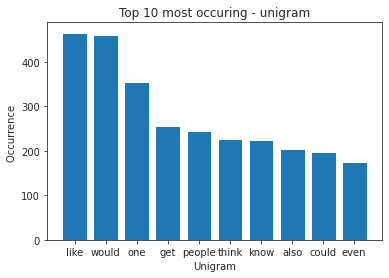

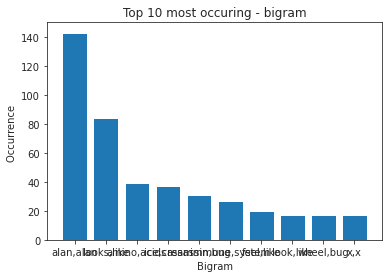

In [ ]:
print("Category - 1")

count_unigram = Counter()
count_bigram = Counter()
for i in range(len(L_text)):
    token = word_tokenize(L_text[i])
    unigram = ngrams(token,1)
    count_unigram += Counter(unigram)
    bigram = ngrams(token,2)
    count_bigram += Counter(bigram)

print(count_unigram.elements())
print(count_unigram.items())

A = count_unigram.most_common(10)  #tuple having text and it's count
B = count_bigram.most_common(10)

A_values = []
A_text = []
B_values = []
B_text = []

for i in range(len(A)):
    A_values.append((A[i][1]))
    B_values.append((B[i][1]))
    A_text.append(str(A[i][0])[2:-3]) #since counter function gives a tuple I'm str slicing from to get string
    B_text.append(str(B[i][0]).replace("(",'').replace(")",'').replace("'",'').replace(" ",''))

# taking uniform buckets to club the polarity values 
plt.title("Top 10 most occuring - unigram") 
# plt.hist(A_values,bins = np.arange(0,10,0.5),ec='black') #to show separate bins 
plt.bar(A_text,A_values)
plt.ylabel('Occurrence ')
plt.xlabel('Unigram')
plt.show()

# taking uniform buckets to club the polarity values 
plt.title("Top 10 most occuring - bigram") 
# plt.hist(A_values,bins = np.arange(0,10,0.5),ec='black') #to show separate bins 
plt.bar(B_text,B_values)
plt.ylabel('Occurrence ')
plt.xlabel('Bigram')
plt.show()

In [ ]:
print(count_unigram.elements)
print(count_unigram.items())

dict_items([(('thing',), 203), (('might',), 84), (('neg',), 10), (('frequenc',), 11), (('depend',), 51), (('select',), 22), (('go',), 225), (('least',), 52), (('common',), 57), (('phenotyp',), 9), (('reflect',), 5), (('genotyp',), 7), (('advantag',), 13), (('environ',), 22), (('instanc',), 10), (('prey',), 16), (('anim',), 71), (('vole',), 3), (('light',), 35), (('dark',), 18), (('predat',), 12), (('recogn',), 9), (('food',), 55), (('fox',), 1), (('may',), 99), (('keep',), 58), (('closer',), 1), (('eye',), 31), (('recognis',), 5), (('good',), 144), (('would',), 459), (('reduc',), 12), (('caus',), 94), (('allel',), 8), (('due',), 21), (('increas',), 29), (('proport',), 8), (('popul',), 31), (('scenario',), 6), (('revers',), 12), (('cycl',), 16), (('continu',), 12), (('perpetu',), 3), (('nnhowev',), 3), (('unlik',), 21), (('strictli',), 2), (('yearli',), 4), (('usual',), 53), (('take',), 109), (('time',), 162), (('year',), 129), (('entir',), 27), (('chang',), 82), (('enough',), 80), (('m

In [ ]:
print(count_unigram.elements)

<bound method Counter.elements of Counter({('like',): 515, ('would',): 459, ('one',): 382, ('get',): 342, ('use',): 268, ('think',): 252, ('peopl',): 247, ('look',): 243, ('know',): 242, ('go',): 225, ('make',): 216, ('cell',): 210, ('thing',): 203, ('also',): 203, ('need',): 199, ('could',): 198, ('even',): 177, ('bodi',): 174, ('thank',): 168, ('say',): 166, ('question',): 164, ('time',): 162, ('much',): 159, ('differ',): 154, ('tri',): 154, ('vaccin',): 151, ('see',): 150, ('realli',): 148, ('alan',): 145, ('good',): 144, ('water',): 144, ('well',): 141, ('eat',): 141, ('way',): 139, ('want',): 134, ('bug',): 133, ('life',): 132, ('mean',): 131, ('year',): 129, ('protein',): 129, ('work',): 127, ('sure',): 125, ('actual',): 121, ('live',): 120, ('probabl',): 119, ('human',): 119, ('someth',): 119, ('first',): 118, ('help',): 116, ('take',): 109, ('lot',): 109, ('speci',): 107, ('ye',): 106, ('kill',): 105, ('find',): 101, ('mani',): 100, ('may',): 99, ('mushroom',): 98, ('die',): 95

In [ ]:
B_text

['alan,alan',
 'look,like',
 'amino,acid',
 'ice,cream',
 'assassin,bug',
 'immun,system',
 'mrna,vaccin',
 'sound,like',
 'wheel,bug',
 'magic,mushroom']

Category - 2


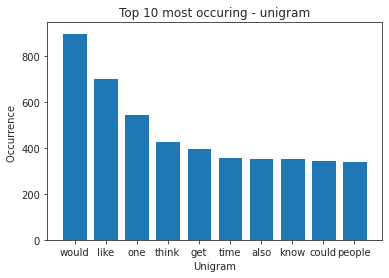

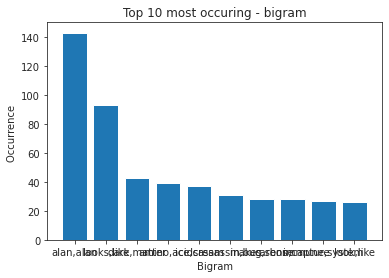

In [ ]:
print("Category - 2")
#count_unigram = Counter()
#count_bigram = Counter()
for i in range(len(L_text2)):
    token = word_tokenize(L_text2[i])
    unigram = ngrams(token,1)
    count_unigram += Counter(unigram)
    bigram = ngrams(token,2)
    count_bigram += Counter(bigram)
    
A = count_unigram.most_common(10)  #tuple having text and it's count
B = count_bigram.most_common(10)

A_values = []
A_text = []
B_values = []
B_text = []

for i in range(len(A)):
    A_values.append((A[i][1]))
    B_values.append((B[i][1]))
    A_text.append(str(A[i][0])[2:-3]) #since counter function gives a tuple I'm str slicing from to get string
    B_text.append(str(B[i][0]).replace("(",'').replace(")",'').replace("'",'').replace(" ",''))

# plot taking uniform buckets to club the polarity values 
plt.title("Top 10 most occuring - unigram") 
# plt.hist(A_values,bins = np.arange(0,10,0.5),ec='black') #to show separate bins 
plt.bar(A_text,A_values)
plt.ylabel('Occurrence ')
plt.xlabel('Unigram')
plt.show()

# plot taking uniform buckets to club the polarity values 
plt.title("Top 10 most occuring - bigram") 
# plt.hist(A_values,bins = np.arange(0,10,0.5),ec='black') #to show separate bins 
plt.bar(B_text,B_values)
plt.ylabel('Occurrence ')
plt.xlabel('Bigram')
plt.show()

In [ ]:
print(count_unigram.elements)
print(count_unigram.items())

<bound method Counter.elements of Counter({('would',): 902, ('like',): 782, ('one',): 589, ('get',): 542, ('think',): 479, ('use',): 445, ('time',): 417, ('make',): 398, ('know',): 392, ('look',): 361, ('also',): 358, ('go',): 357, ('could',): 348, ('peopl',): 345, ('thing',): 332, ('see',): 325, ('say',): 315, ('even',): 307, ('need',): 289, ('thank',): 280, ('way',): 279, ('differ',): 275, ('much',): 268, ('energi',): 267, ('question',): 259, ('physic',): 256, ('realli',): 253, ('work',): 252, ('good',): 249, ('mean',): 249, ('tri',): 226, ('actual',): 223, ('want',): 221, ('well',): 216, ('light',): 213, ('cell',): 212, ('someth',): 206, ('water',): 195, ('bodi',): 193, ('lot',): 193, ('year',): 189, ('understand',): 188, ('first',): 186, ('take',): 184, ('sure',): 182, ('still',): 180, ('right',): 180, ('point',): 179, ('forc',): 173, ('probabl',): 172, ('help',): 167, ('ye',): 166, ('mani',): 160, ('matter',): 154, ('vaccin',): 151, ('experi',): 151, ('read',): 150, ('chang',): 14

In [ ]:
B_text

['dark,matter',
 'carbon,captur',
 'make,sens',
 'kinet,energi',
 'steril,neutrino',
 'seem,like',
 'speed,light',
 'quantum,mechan',
 'ls,away',
 'look,like']

Category - 3


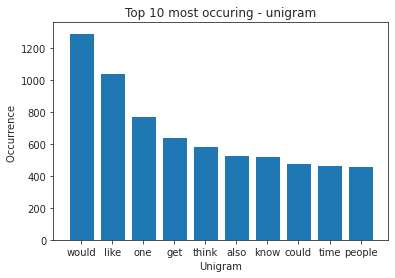

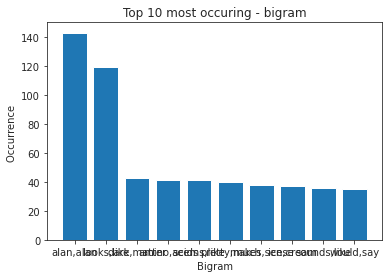

In [ ]:
print("Category - 3")
#count_unigram = Counter()
#count_bigram = Counter()
for i in range(len(L_text3)):
    token = word_tokenize(L_text3[i])
    unigram = ngrams(token,1)
    count_unigram += Counter(unigram)
    bigram = ngrams(token,2)
    count_bigram += Counter(bigram)
    
A = count_unigram.most_common(10)  #tuple having text and it's count
B = count_bigram.most_common(10)

A_values = []
A_text = []
B_values = []
B_text = []

for i in range(len(A)):
    A_values.append((A[i][1]))
    B_values.append((B[i][1]))
    A_text.append(str(A[i][0])[2:-3]) #since counter function gives a tuple I'm str slicing from to get string
    B_text.append(str(B[i][0]).replace("(",'').replace(")",'').replace("'",'').replace(" ",''))

# plot taking uniform buckets to club the polarity values 
plt.title("Top 10 most occuring - unigram") 
# plt.hist(A_values,bins = np.arange(0,10,0.5),ec='black') #to show separate bins 
plt.bar(A_text,A_values)
plt.ylabel('Occurrence ')
plt.xlabel('Unigram')
plt.show()

# plot taking uniform buckets to club the polarity values 
plt.title("Top 10 most occuring - bigram") 
#plt.hist(A_values,bins = np.arange(0,10,0.5),ec='black') #to show separate bins 
plt.bar(B_text,B_values)
plt.ylabel('Occurrence ')
plt.xlabel('Bigram')
plt.show()

In [ ]:
print(count_unigram.elements)
print(count_unigram.items())

<bound method Counter.elements of Counter({('would',): 1295, ('like',): 1168, ('one',): 837, ('get',): 835, ('use',): 777, ('make',): 679, ('think',): 656, ('know',): 584, ('time',): 556, ('go',): 539, ('also',): 531, ('look',): 506, ('thing',): 484, ('could',): 482, ('work',): 482, ('peopl',): 465, ('thank',): 457, ('much',): 456, ('need',): 455, ('see',): 448, ('say',): 422, ('even',): 419, ('good',): 410, ('way',): 410, ('realli',): 401, ('differ',): 380, ('tri',): 364, ('want',): 357, ('water',): 357, ('mean',): 349, ('question',): 324, ('lot',): 324, ('energi',): 316, ('well',): 315, ('someth',): 308, ('actual',): 304, ('physic',): 300, ('sure',): 292, ('year',): 291, ('help',): 284, ('probabl',): 271, ('first',): 269, ('take',): 267, ('acid',): 262, ('understand',): 259, ('still',): 257, ('chemistri',): 256, ('right',): 255, ('ye',): 251, ('point',): 245, ('light',): 235, ('cell',): 233, ('find',): 232, ('mani',): 221, ('experi',): 218, ('bodi',): 215, ('read',): 211, ('pretti',)

In [ ]:
print(count_unigram.keys())

dict_keys([('thing',), ('might',), ('neg',), ('frequenc',), ('depend',), ('select',), ('go',), ('least',), ('common',), ('phenotyp',), ('reflect',), ('genotyp',), ('advantag',), ('environ',), ('instanc',), ('prey',), ('anim',), ('vole',), ('light',), ('dark',), ('predat',), ('recogn',), ('food',), ('fox',), ('may',), ('keep',), ('closer',), ('eye',), ('recognis',), ('good',), ('would',), ('reduc',), ('caus',), ('allel',), ('due',), ('increas',), ('proport',), ('popul',), ('scenario',), ('revers',), ('cycl',), ('continu',), ('perpetu',), ('nnhowev',), ('unlik',), ('strictli',), ('yearli',), ('usual',), ('take',), ('time',), ('year',), ('entir',), ('chang',), ('enough',), ('make',), ('larg',), ('differ',), ('alter',), ('fit',), ('nnmore',), ('like',), ('basi',), ('experienc',), ('fluctuat',), ('altern',), ('condit',), ('favor',), ('one',), ('anoth',), ('perhap',), ('plant',), ('speci',), ('live',), ('area',), ('flood',), ('everi',), ('two',), ('much',), ('better',), ('dryer',), ('wet',),

In [ ]:
A_values

[393, 386, 332, 293, 281, 248, 231, 230, 192, 188]

In [ ]:
B_values

[33, 27, 24, 23, 20, 18, 17, 16, 15, 15]

In [ ]:
B_text

['look,like',
 'lone,pair',
 'make,sure',
 'organ,chemistri',
 'pretti,much',
 'sound,like',
 'boric,acid',
 'seem,like',
 'would,say',
 'grad,school']

In [ ]:
L_text = L_text+L_text2+L_text3
L_text

['thing might neg frequenc depend select go least common phenotyp reflect genotyp go advantag environ instanc prey anim vole light dark phenotyp predat might recogn common phenotyp food light vole common fox may keep closer eye light phenotyp vole recognis good prey would reduc light caus allel due increas predat dark genotyp would increas proport popul scenario revers cycl continu perpetu nnhowev unlik strictli yearli usual take time year entir popul allel frequenc chang enough make larg enough differ alter fit nnmore like year year basi popul experienc fluctuat select altern condit environ favor one genotyp anoth perhap plant speci live area flood everi year two phenotyp popul plant much better dryer year one better wet year flood drytyp genotyp fit lead offspr therefor dri allel popul howev flood year wetlik phenotyp better propag wet gene',
 'bee',
 'medic technician alot drug liver probabl die immedi fine take care self tho definit good bodi',
 'shove ass see happen',
 '',
 'well 

##apply word2vec

In [ ]:
model = Word2Vec(corpus, size=50, min_count=2)

In [ ]:
vec = model.wv['genes']
vec

array([-0.04673506,  0.02104538, -0.03838291, -0.01732455,  0.13367774,
        0.07263339,  0.07966917,  0.00626112,  0.1342187 , -0.15813793,
        0.0897862 ,  0.03099277, -0.12582178, -0.18847355, -0.09001134,
        0.11829455,  0.23023738, -0.15644804, -0.08253177,  0.05570681,
       -0.00927547,  0.09704126,  0.08627672, -0.08359732, -0.18456735,
        0.27244157,  0.12216356,  0.00315176, -0.03167884,  0.00780631,
       -0.07824256,  0.07034305,  0.10718478,  0.01666201,  0.05427704,
       -0.01983199, -0.14109911, -0.02081005,  0.24583262,  0.0839477 ,
        0.1007141 ,  0.00143785,  0.00187963, -0.01779919, -0.08647702,
       -0.03716112,  0.04570278, -0.07455306,  0.07468089,  0.09717072],
      dtype=float32)

In [ ]:
print( model.wv.most_similar(positive=['genes', 'amino'], topn=10))

[('add', 0.9997164011001587), ('especially', 0.9997125864028931), ('within', 0.9996975064277649), ('form', 0.9996870756149292), ('neutron', 0.9996843934059143), ('may', 0.9996823668479919), ('however', 0.999681293964386), ('particles', 0.9996808767318726), ('species', 0.9996783137321472), ('imagine', 0.9996774196624756)]


In [ ]:
Z = model.wv.syn0;
print(Z[0].shape)
print(Z[0])

(50,)
[ 8.8401288e-01 -1.6910356e+00 -1.0453099e+00  4.1292232e-01
  1.6351348e-03 -9.9609828e-01  9.9452263e-01 -9.4341892e-01
  5.5587721e-01 -5.7412642e-01 -7.4569976e-01  1.2324914e-01
  1.0107983e+00  9.7990137e-01 -4.1658941e-01 -1.5677723e+00
 -8.6863142e-01 -3.7382573e-01  8.1799912e-01 -1.2971714e+00
  1.6086873e-01 -2.8235459e-01  6.0416383e-01 -2.1394722e+00
  8.7942624e-01  1.3848729e+00 -1.0466869e+00 -1.2650871e+00
  1.0326865e+00  6.1456335e-01 -7.1213984e-01  7.1382302e-01
  1.9769961e-01 -2.4553046e-01 -9.2772430e-01  4.0875864e-01
  1.1773074e+00 -9.9360603e-01  1.2280009e+00 -1.0396610e-01
  5.0851059e-01 -2.4631732e+00 -1.1198057e+00  2.5985897e-01
  6.8639725e-01  5.5453712e-01 -1.8492435e+00  6.1333150e-01
  3.6024728e-01  2.0898665e-01]


In [ ]:
X = model[model.wv.vocab]

In [ ]:
np.shape(X)

(9178, 50)

In [ ]:
vocab = list(model.wv.vocab)
np.shape(vocab)

(9178,)

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.vocab)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



x_vals, y_vals, labels = reduce_dimensions(model)

TypeError: ignored

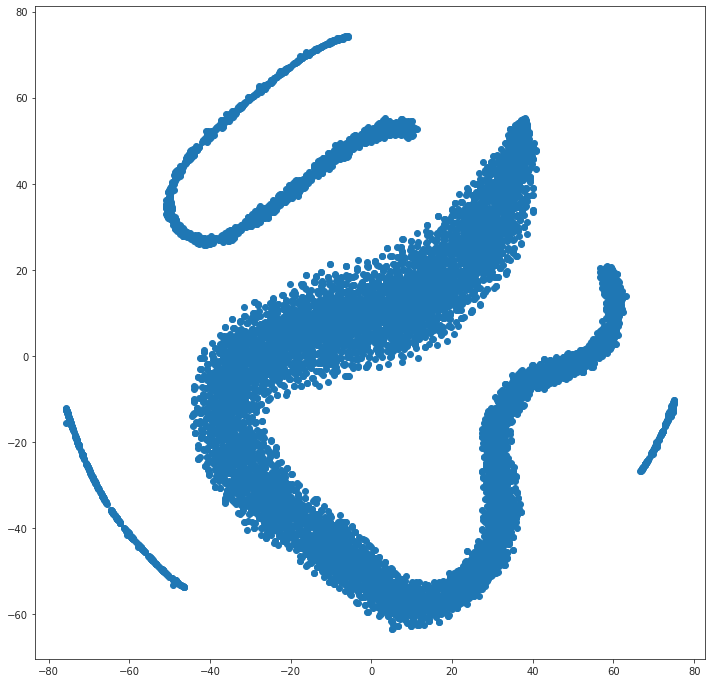

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


plot_with_matplotlib(x_vals, y_vals, labels)

##Clustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=100,linkage='complete')
idx = cluster.fit_predict(Z)

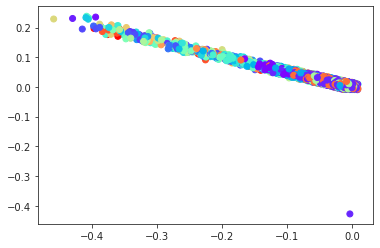

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
print(idx)

[1 1 1 ... 0 0 0]


In [ ]:
labels=idx

In [ ]:
reddit_df.Comment.tolist()

In [ ]:
clusters = {}
n = 0
for item in labels:
  if item in clusters:
    clusters[item].append(vocab[n])
  else:
    clusters[item] = [vocab[n]]
  n +=1


In [ ]:
for item in clusters:
  print ("Cluster ", item)
  for i in clusters[item]:
    print (i)
  print("********************************************")

Streaming output truncated to the last 5000 lines.
fundamentally
drag
nmy
replied
load
twin
intensities
methyl
er
sufficient
karen
reactivity
fall
murder
united
universal
acceptor
hint
broke
collision
damaged
tadpoles
monthsnnthanks
resulting
semiconductor
substrate
entertainment
block
releases
typically
nfl
cotton
candy
rforbiddenfood
distilled
immortal
speech
fashion
assasin
loved
spirit
recapture
advantageous
scheme
damage
tarantula
antes
los
tutores
worn
rust
evaporate
trace
swimming
phosphorus
nano
architecture
synthetic
surfaces
professionally
wanting
ripple
lifestyle
activities
showers
hitting
coughcommon
thoughnnhe
developrelease
gsknna
vaccination
arrest
pea
enlighten
culture
historical
diagnosis
radioactivity
sexually
revolves
untreated
fate
sit
amine
suffering
calm
sign
phones
publishers
closest
sake
defend
unpredictable
rushed
astronomical
chronic
cock
pages
adsorb
extracting
assumed
thread
integrate
imma
jerusalem
orange
cohort
sanger
transfer
sooo
skull
younger
richard
si

##Tf Bag of Words

In [ ]:
counter=Counter()
comment_len=np.zeros(len(text))
tf={}

for i in range(len(text)):
  token = word_tokenize(text[i])
  comment_len[i] = len(token)
  unigram = ngrams(token,1)
  counter += Counter(unigram)

In [ ]:
counter

Counter({('things',): 272,
         ('might',): 199,
         ('negative',): 41,
         ('frequency',): 23,
         ('dependent',): 18,
         ('selection',): 19,
         ('going',): 256,
         ('least',): 132,
         ('common',): 80,
         ('phenotype',): 5,
         ('reflected',): 3,
         ('genotype',): 3,
         ('advantage',): 15,
         ('environment',): 27,
         ('instance',): 17,
         ('prey',): 15,
         ('animal',): 36,
         ('vole',): 1,
         ('light',): 212,
         ('dark',): 84,
         ('predator',): 4,
         ('recognize',): 10,
         ('food',): 100,
         ('voles',): 2,
         ('foxes',): 1,
         ('may',): 200,
         ('keeping',): 12,
         ('closer',): 20,
         ('eye',): 21,
         ('phenotypic',): 2,
         ('recognising',): 2,
         ('good',): 408,
         ('would',): 1295,
         ('reduce',): 13,
         ('causing',): 25,
         ('alleles',): 5,
         ('due',): 71,
         ('increas

In [ ]:
#Importing required module
import numpy as np
from nltk.tokenize import  word_tokenize 
 
#Example text corpus for our tutorial
corpus = []
for sentence in reddit_df['Comment'].iteritems():
    word_list = sentence[1].split(" ")
    corpus.append(word_list)

from collections import Counter


#creating counter of words
#calculating total number of words using generators

keys = list(counter.keys())
vals = list(counter.values())

for i in range(len(text)):
  token = word_tokenize(text[i])
  for word in token:
    for cluster in clusters:
      for i in clusters[cluster]:
        if (word == i):
          tf[cluster] = tf[cluster] + (vals[keys.index(word)] / comment_len[i])
    

In [ ]:
counter.items()

dict_items([(('things',), 272), (('might',), 199), (('negative',), 41), (('frequency',), 23), (('dependent',), 18), (('selection',), 19), (('going',), 256), (('least',), 132), (('common',), 80), (('phenotype',), 5), (('reflected',), 3), (('genotype',), 3), (('advantage',), 15), (('environment',), 27), (('instance',), 17), (('prey',), 15), (('animal',), 36), (('vole',), 1), (('light',), 212), (('dark',), 84), (('predator',), 4), (('recognize',), 10), (('food',), 100), (('voles',), 2), (('foxes',), 1), (('may',), 200), (('keeping',), 12), (('closer',), 20), (('eye',), 21), (('phenotypic',), 2), (('recognising',), 2), (('good',), 408), (('would',), 1295), (('reduce',), 13), (('causing',), 25), (('alleles',), 5), (('due',), 71), (('increased',), 11), (('predation',), 2), (('genotypes',), 4), (('increase',), 38), (('proportion',), 7), (('population',), 24), (('scenario',), 16), (('reversed',), 2), (('cycle',), 22), (('continues',), 5), (('perpetually',), 2), (('nnhowever',), 6), (('unlikely

In [ ]:
tf

{'things might negative frequency dependent selection going least common phenotype reflected genotype going advantage environment instance prey animal vole light dark phenotype predator might recognize common phenotype food light voles common foxes may keeping closer eye light phenotypic voles recognising good prey would reduce light causing alleles due increased predation dark genotypes would increase proportion population scenario reversed cycle continues perpetually nnhowever unlikely strictly yearly usually takes time year entire populations allele frequencies change enough make large enough difference alter fitness nnmore likely year year basis population experiencing fluctuating selection alternating conditions environment favor one genotype another perhaps plant species living area flooded every year two phenotypes population plants much better dryer year one better wet year flooding drytype genotype fitness leading offspring therefore dry alleles population however flooded year

In [ ]:
corpus

[['things',
  'might',
  'negative',
  'frequency',
  'dependent',
  'selection',
  'going',
  'least',
  'common',
  'phenotype',
  'reflected',
  'genotype',
  'going',
  'advantage',
  'environment',
  'instance',
  'prey',
  'animal',
  'vole',
  'light',
  'dark',
  'phenotype',
  'predator',
  'might',
  'recognize',
  'common',
  'phenotype',
  'food',
  'light',
  'voles',
  'common',
  'foxes',
  'may',
  'keeping',
  'closer',
  'eye',
  'light',
  'phenotypic',
  'voles',
  'recognising',
  'good',
  'prey',
  'would',
  'reduce',
  'light',
  'causing',
  'alleles',
  'due',
  'increased',
  'predation',
  'dark',
  'genotypes',
  'would',
  'increase',
  'proportion',
  'population',
  'scenario',
  'reversed',
  'cycle',
  'continues',
  'perpetually',
  'nnhowever',
  'unlikely',
  'strictly',
  'yearly',
  'usually',
  'takes',
  'time',
  'year',
  'entire',
  'populations',
  'allele',
  'frequencies',
  'change',
  'enough',
  'make',
  'large',
  'enough',
  'differ

##Representing the Comments as vectors using Bag of words(BOW) approach

In [ ]:
count_unigram

Counter({('thing',): 484,
         ('might',): 199,
         ('neg',): 49,
         ('frequenc',): 33,
         ('depend',): 159,
         ('select',): 34,
         ('go',): 539,
         ('least',): 132,
         ('common',): 80,
         ('phenotyp',): 10,
         ('reflect',): 13,
         ('genotyp',): 7,
         ('advantag',): 19,
         ('environ',): 33,
         ('instanc',): 20,
         ('prey',): 17,
         ('anim',): 79,
         ('vole',): 3,
         ('light',): 235,
         ('dark',): 92,
         ('predat',): 13,
         ('recogn',): 13,
         ('food',): 109,
         ('fox',): 2,
         ('may',): 200,
         ('keep',): 123,
         ('closer',): 20,
         ('eye',): 56,
         ('recognis',): 6,
         ('good',): 410,
         ('would',): 1295,
         ('reduc',): 36,
         ('caus',): 165,
         ('allel',): 8,
         ('due',): 72,
         ('increas',): 80,
         ('proport',): 21,
         ('popul',): 33,
         ('scenario',): 19,
     

In [ ]:
np.array(list(count_unigram.items()))

array([[('thing',), 484],
       [('might',), 199],
       [('neg',), 49],
       ...,
       [('pva',), 1],
       [('particlesnny',), 1],
       [('entropynnif',), 1]], dtype=object)

In [ ]:
# preprocessing the text corpus 
# lowering case and removing stopwords
# Ignoring punctuation & special character
# Reducing words to their stem (e.g. “play” from “playing”) (Optional)

#L_text = [i.lower() for i in reddit_df.Comment.loc[reddit_df.Topic =="Biology"].tolist()]
#L_text = [i.replace('[^\w\s]','') for  i in L_text]

# Building the Bag of Words model - represent text for feature extraction
# 1. Tokenize each sentence to words, take all the words & count them to find frequent words
# 2. Label them to Create binary vector of length L(unique words)
# 3. Take Single token (I'm taking unigrams as we already having unigram for all comments)

A = np.array(list(count_unigram.items()))  #changing counter object to tuple (containing word and token count)

A_values = []
A_text = []
for i in range(len(A)):
    A_values.append((A[i][1]))
    A_text.append(A[i][0])

    
def makebow(L_text):
    BOW = []  #list of binary list(vectors)
    for i in range(len(L_text)):
        row = L_text[i]
        sent_vec = []
        eachrow_tokens = word_tokenize(row)
        for word in A_text:
            word = str(word)[2:-3]
            if word in eachrow_tokens:
                sent_vec.append(1)
            else:
                sent_vec.append(0)
        BOW.append(sent_vec)
    return BOW

bow = []
bow = makebow(L_text)

# uncomment below line to view
# bow  

In [ ]:
np.shape(bow)

(8695, 13465)

In [ ]:
print(count_unigram.most_common(50))

[(('would',), 1295), (('like',), 1168), (('one',), 837), (('get',), 835), (('use',), 777), (('make',), 679), (('think',), 656), (('know',), 584), (('time',), 556), (('go',), 539), (('also',), 531), (('look',), 506), (('thing',), 484), (('could',), 482), (('work',), 482), (('peopl',), 465), (('thank',), 457), (('much',), 456), (('need',), 455), (('see',), 448), (('say',), 422), (('even',), 419), (('good',), 410), (('way',), 410), (('realli',), 401), (('differ',), 380), (('tri',), 364), (('want',), 357), (('water',), 357), (('mean',), 349), (('question',), 324), (('lot',), 324), (('energi',), 316), (('well',), 315), (('someth',), 308), (('actual',), 304), (('physic',), 300), (('sure',), 292), (('year',), 291), (('help',), 284), (('probabl',), 271), (('first',), 269), (('take',), 267), (('acid',), 262), (('understand',), 259), (('still',), 257), (('chemistri',), 256), (('right',), 255), (('ye',), 251), (('point',), 245)]


In [ ]:
# Using sklearn to trained a decent machine learning model to classify the comments

# libraries - Trying different Models By checking accuracies and modifying other parameters
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# libraries - labelling of data & analysis metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# since there are more than 60k duplicate comments in overall 100k 
# It's highly likely that model will give 100% accuracy in that case therfore removing duplicates

#dataset = reddit_df.drop_duplicates().copy()     #copy of original dataset
#Since scikit built-in model uses float not string directly we are using label encoder to label binary numbers out to category
#dataset.text = LabelEncoder().fit_transform(dataset.Comment) 
#dataset.subreddit = LabelEncoder().fit_transform(dataset.Topic) 

# splitting the dataset 70% for training and 30% for testing 
text_train, text_test, subreddit_train, subreddit_test = train_test_split(d, dataset.subreddit, test_size = 0.3)

# model = LogisticRegression()
# model = RandomForestRegressor()
# model = RandomForestClassifier()
# model = SVC()
model = KNeighborsClassifier()

# fitting the model 
model.fit(text_train, subreddit_train)

# evaluating the model for predictions
predicted = model.predict(text_test)

# accuracy of predictions by matching predicted and test 
acc = accuracy_score(subreddit_test, predicted)
print('Accuracy: %.3f' % (acc*100))

# metrics showing -  precision, accuracy, recall and F1-score. 
print(metrics.classification_report(subreddit_test, predicted))

#assigning text label to display predicted category
label_predicted = []
for i in range(len(predicted)):
    if predicted[i] == 0:
        label_predicted.append("humor")
    elif predicted[i] == 1:
        label_predicted.append("news")
        
conf_matrix = confusion_matrix(subreddit_test, predicted,labels=[0,1])
print(conf_matrix)

# Plotting confusion matrix to demonstrate our model’s performance.
plt.matshow(conf_matrix)
plt.title('Confusion Matrix\n')
plt.xlabel('Predicted')
plt.ylabel('Correct')

plt.colorbar()
plt.show()
print("0 represents  - Humour \n1 represents  - News")
print("\nNote - Model performance could be improved But I left that part for you :) ")
label_predicted

In [ ]:
train.shape

(8695, 3)

In [ ]:
train.head(10)

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
5,0xb39,I meant that the question itself is unclear.,Chemistry
6,0x1f3d,Shove it up your ass and see what happens,Biology
7,0x531,"??? I mean it has some butter, but besides tha...",Chemistry
8,0xe05,https://t.me/joinchat/3gElLHLuMCxhNGI0,Biology
9,0x2148,"Well, that’s just the thing. You can’t really ...",Biology


In [ ]:
train = train.drop('Id', axis=1)
train.head(10)

,Comment,Topic
0,A few things. You might have negative- frequen...,Biology
1,Is it so hard to believe that there exist part...,Physics
2,There are bees,Biology
3,I'm a medication technician. And that's alot o...,Biology
4,Cesium is such a pretty metal.,Chemistry
5,I meant that the question itself is unclear.,Chemistry
6,Shove it up your ass and see what happens,Biology
7,"??? I mean it has some butter, but besides tha...",Chemistry
8,https://t.me/joinchat/3gElLHLuMCxhNGI0,Biology
9,"Well, that’s just the thing. You can’t really ...",Biology


In [ ]:
test.shape

(1586, 3)

In [ ]:
test.head(10)

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
5,0x1357,It's probably my perspective too because I liv...,Chemistry
6,0x464,I suppose you could engineer a retrovirus that...,Biology
7,0x803,You already received some great answers. If yo...,Biology
8,0x1866,Seeing as we are day animals I doubt we use th...,Biology
9,0x11a,"If you can't show and explain your data, you l...",Physics


In [ ]:
test = test.drop('Id', axis=1)
test.head(10)

,Comment,Topic
0,Personally I have no idea what my IQ is. I’ve ...,Biology
1,I'm skeptical. A heavier lid would be needed t...,Physics
2,I think I have 100 cm of books on the subject....,Biology
3,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,"In addition to the other comment, you can crit...",Physics
5,It's probably my perspective too because I liv...,Chemistry
6,I suppose you could engineer a retrovirus that...,Biology
7,You already received some great answers. If yo...,Biology
8,Seeing as we are day animals I doubt we use th...,Biology
9,"If you can't show and explain your data, you l...",Physics


In [ ]:
# To check for duplicated data
train[train["Comment"].duplicated()]

,Comment,Topic
84,[removed],Physics
86,[removed],Physics
108,[removed],Physics
115,[removed],Physics
162,[deleted],Biology
...,...,...
8669,Thank you!,Chemistry
8681,Nice,Chemistry
8685,Thank you for your kindness <3 Found this [inj...,Biology
8690,I make similar observations over the last week...,Biology


In [ ]:
# #To drop the duplicated data
train=train.drop_duplicates(keep='first',subset='Comment')
train.shape

(7950, 2)

In [ ]:
X_datatrain = train['Comment']
y_datatrain = train['Topic']
X_datatest = test['Comment']  

In [ ]:
X_datatrain

0       A few things. You might have negative- frequen...
1       Is it so hard to believe that there exist part...
2                                          There are bees
3       I'm a medication technician. And that's alot o...
4                          Cesium is such a pretty metal.
                              ...                        
8688    First off, matter can absolutely be created an...
8689    Thank You - If I assumed it was an electric he...
8691                                      You would know.
8692              Also use the correct number of sig figs
8694                            I would like to know too.
Name: Comment, Length: 7950, dtype: object

In [ ]:
cleandata_Train

0       thing might negat frequenc depend select least...
1       hard believ exist particular detect anyth inve...
2                                                     bee
3       medic technician alot drug liver probabl die i...
4                                     cesium pretti metal
                              ...                        
8688    first matter absolut creat destroy standard co...
8689    thank assum electr heater would formula nyou c...
8691                                           would know
8692                      also use correct number sig fig
8694                                      would like know
Name: Comment, Length: 7950, dtype: object

In [ ]:
cleandata_Train.head(1)

0    thing might negat frequenc depend select least...
Name: Comment, dtype: object

In [ ]:
y_datatrain.replace({'Biology': 1, 'Physics': 2, 'Chemistry':3},inplace = True)
test['Topic'].replace({'Biology': 1, 'Physics': 2, 'Chemistry':3},inplace = True)

In [ ]:
y_datatrain.value_counts()

1    3047
3    2864
2    2039
Name: Topic, dtype: int64

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2)
X = vectorizer.fit_transform(cleandata_Train)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
vectorizer.get_feature_names_out()
print(X)
print(X.shape)


{'thing': 8115, 'might': 4094, 'negat': 4370, 'frequenc': 2525, 'depend': 1600, 'select': 6542, 'least': 3544, 'common': 1193, 'phenotyp': 5007, 'reflect': 5965, 'genotyp': 2611, 'advantag': 133, 'environ': 2038, 'instanc': 3247, 'prey': 5265, 'anim': 323, 'light': 3626, 'dark': 1499, 'predat': 5194, 'recogn': 5916, 'food': 2443, 'may': 3982, 'keep': 3392, 'closer': 1125, 'eye': 2230, 'recognis': 5917, 'good': 2742, 'would': 9640, 'reduc': 5953, 'caus': 926, 'allel': 195, 'due': 1851, 'increas': 3186, 'proport': 5445, 'popul': 5145, 'scenario': 6398, 'revers': 6196, 'cycl': 1482, 'continu': 1293, 'perpetu': 4981, 'nhowev': 4464, 'unlik': 8680, 'strict': 7472, 'year': 9869, 'usual': 8843, 'take': 7755, 'time': 8266, 'entir': 2028, 'chang': 982, 'enough': 2014, 'make': 3856, 'larg': 3497, 'differ': 1662, 'alter': 257, 'fit': 2391, 'nmore': 4504, 'like': 3642, 'basi': 555, 'experi': 2185, 'fluctuat': 2427, 'altern': 258, 'condit': 1246, 'favor': 2292, 'one': 4697, 'anoth': 332, 'perhap': 

In [ ]:
data_dtm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
data_dtm.index = cleandata_Train.index
data_dtm

,abdomen,abil,abil make,abl,abl find,abl get,abl make,abl see,abl tell,abl understand,...,zero,zero degre,zero nso,zero second,zika,zinc,zinc air,zip,zip bag,zone
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8689,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8691,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8692,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
print(vectorizer.get_feature_names_out(10))

['aaa' 'aaaaaaaam' 'aaaaah' ... 'zwitterion' 'zygomat' 'zyklon']


In [ ]:
print(X[1])

  (0, 12658)	0.23817737679786563
  (0, 16846)	0.14744723522223022
  (0, 5706)	0.16785918454656545
  (0, 7135)	0.2044315709051134
  (0, 15786)	0.21271911400856133
  (0, 8701)	0.17033639949063967
  (0, 8706)	0.16503435577906475
  (0, 9028)	0.1682289920428886
  (0, 10221)	0.16974886589622426
  (0, 5523)	0.18573912125748912
  (0, 7828)	0.2636913026523998
  (0, 16917)	0.24593419849616938
  (0, 751)	0.17364953162652827
  (0, 4000)	0.49919339230755894
  (0, 2065)	0.16242192864771626
  (0, 11352)	0.3259756870641142
  (0, 5299)	0.2177449854989287
  (0, 1367)	0.1873123117420651
  (0, 6727)	0.1842340560187374


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
X_tr, X_te, y_tr, y_te = train_test_split(X, y_datatrain, test_size = 0.2, random_state = 42)


model.fit(X_tr.toarray(),y_tr)
y_pred = model.predict(X_te.toarray())

from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_te, y_pred))
#print(f1_score(y_te, y_pred))
#print(precision_score(y_te, y_pred))

0.6251572327044025


##word2vec

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
word2vec_model["beautiful"]

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24